/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


SVM Accuracy:  0.9517142857142857
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.94      0.95      0.94      1380
           3       0.94      0.93      0.94      1433
           4       0.93      0.96      0.94      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.93      0.93      0.93      1357
           9       0.94      0.92      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

SVM Confusion Matrix:
 [[1315    4    0    1    1    1   14    1    4    2]
 [   1 1568   11    0   14    0    2    1    2    1]
 [   3   10 1309   20   10    0    0   13   14    

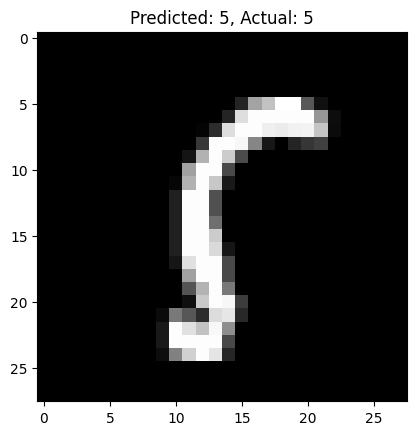

In [8]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.feature import hog
from skimage import exposure

# Step 2: Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
y = y.astype(np.uint8)

# Step 3: Data Preprocessing
# Normalize the images
X = X.astype(np.float32) / 255.0

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Extraction - HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        image_reshaped = image.reshape(28, 28).astype(np.float32)
        feature, hog_image = hog(image_reshaped, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(feature)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Step 6: Train SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train_hog, y_train)
y_pred_svm = svm.predict(X_test_hog)

# Step 7: Evaluate SVM Model
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Step 8: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_hog, y_train)
y_pred_rf = rf.predict(X_test_hog)

# Step 9: Evaluate Random Forest Model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 10: Train CNN Model
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_data=(X_test_cnn, y_test))

# Step 11: Evaluate CNN Model
cnn_loss, cnn_accuracy = cnn.evaluate(X_test_cnn, y_test)
print("CNN Accuracy: ", cnn_accuracy)

# Step 12: Deploying the Model (Mock Deployment Example)
def predict_digit(image, model):
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image)
    return np.argmax(prediction)

# Testing with a random image from the test set
random_idx = np.random.randint(0, len(X_test))
test_image = X_test[random_idx]
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predict_digit(test_image, cnn)}, Actual: {y_test[random_idx]}")
plt.show()
